In [69]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy.io
import scipy.misc
from matplotlib.image import imread
import random

from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils

In [2]:
os.listdir()

['Untitled.ipynb', 'test1', 'train', '.ipynb_checkpoints']

In [9]:
SYS_PATH = os.getcwd() + "/"

In [10]:
SYS_PATH

'/Users/adhishthite/Projects/Dogs-Cats/'

In [14]:
os.listdir(SYS_PATH+"train")

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg',
 'cat.3406.jpg',
 'dog.1753.jpg',
 'cat.4369.jpg',
 'cat.7660.jpg',
 'dog.5535.jpg',
 'cat.8553.jpg',
 'cat.9895.jpg',
 'cat.1211.jpg',
 'dog.3144.jpg',
 'dog.775.jpg',
 'dog.11102.jpg',
 'cat.6218.jpg',
 'dog.11664.jpg',
 'dog.3622.jpg',
 'cat.1577.jpg',
 'cat.12020.jpg',
 'dog.5253.jpg',
 'cat.7106.jpg',
 'cat.8235.jpg',
 'cat.952.jpg',
 'dog.9469.jpg',
 'dog.1035.jpg',
 'cat.3360.jpg',
 'cat.11529.jpg',
 'cat.10637.jpg',
 'dog.6982.jpg',
 'dog.8777.jpg',
 'dog.7444.jpg',
 'cat.5711.jpg',
 'cat.946.jpg',
 'cat.3374.jpg',
 'dog.1021.jpg',
 'dog.6996.jpg',
 'cat.10623.jpg',
 'dog.8763.jpg',
 'cat.5705.jpg',
 'dog.7450.jpg',
 'dog.12379.jpg',
 'dog.11670.jpg',
 'dog.4159.jpg',
 'cat.1563.jpg',
 'dog.3636.jpg',
 'cat.12034.jpg',
 'dog.2528.jpg',
 'cat.7112.jpg',
 'dog.5247.jpg',
 'cat.8221.jpg',
 'dog.10208.jpg',
 'dog.5521.jpg',
 'cat.7674.jpg',
 'cat.8547.jpg',
 'cat.9881.jpg',
 'dog.761.jpg',
 'dog.3

In [58]:
labels = []
features = []

for file in os.listdir(SYS_PATH+"train"): 
    
    img = np.asarray(Image.open(SYS_PATH+"train/" + file).resize((128, 128)))

    if "cat" in file:
        features.append(img)
        labels.append(0)
    elif "dog" in file:
        features.append(img)
        labels.append(1)
    else:
        print(file)

features = np.asarray(features)
labels = np.asarray(labels).reshape(len(labels), 1)
print(features.shape)
print(labels.shape)

(25000, 128, 128, 3)
(25000, 1)


In [60]:
#np.save('train-features.npy', features)
#np.save('train-labels.npy', labels)

In [61]:
X = features
y = labels


 [0]


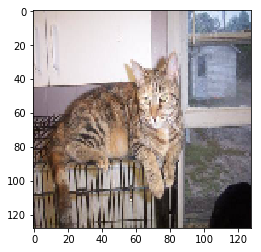


 [0]


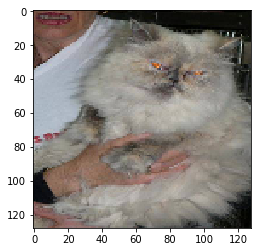


 [1]


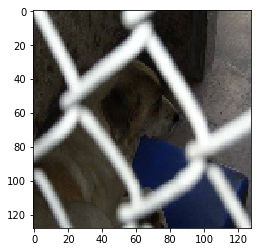


 [1]


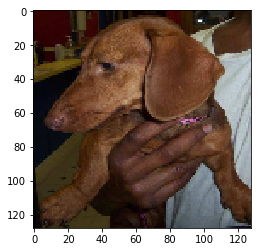


 [0]


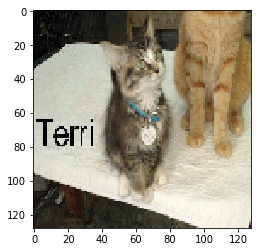

In [64]:
for i in random.sample(range(1, X.shape[0]), 5):
    print('\n', y[i])
    plt.imshow(X[i])
    plt.show()

In [89]:
X = X.astype('float32')
X /= 255

y = np_utils.to_categorical(y)

In [90]:
y

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [85]:
input_shape = (128, 128 , 3)

In [95]:
# KERAS MODEL

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape, name='conv_1a'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape, name='conv_1b'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1'))

model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2a'))
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2b'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_2'))

model.add(Conv2D(128, (5, 5), activation='relu', name='conv_3a'))
model.add(Conv2D(128, (5, 5), activation='relu', name='conv_3b'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_3'))

model.add(Conv2D(256, (3, 3), activation='relu', name='conv_4a'))
model.add(Conv2D(256, (3, 3), activation='relu', name='conv_4b'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_4'))

model.add(Flatten(name='Flatten'))

# DNN Classifier Layers
model.add(Dense(256, activation='relu', name='Dense1'))
model.add(Dense(128, activation='relu', name='Dense2'))
model.add(Dense(64, activation='relu', name='Dense3'))
model.add(Dense(32, activation='relu', name='Dense4'))
model.add(Dense(16, activation='relu', name='Dense5'))
model.add(Dense(8, activation='relu', name='Dense6'))
model.add(Dense(4, activation='relu', name='Dense7'))

# Output Layer
model.add(Dense(2, activation='softmax', name='Output'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 127, 127, 32)      416       
_________________________________________________________________
conv_1b (Conv2D)             (None, 126, 126, 32)      4128      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 63, 63, 32)        0         
_________________________________________________________________
conv_2a (Conv2D)             (None, 61, 61, 64)        18496     
_________________________________________________________________
conv_2b (Conv2D)             (None, 59, 59, 64)        36928     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 29, 29, 64)        0         
_________________________________________________________________
conv_3a (Conv2D)             (None, 25, 25, 128)       204928    
__________

In [97]:
model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=1)

Epoch 1/1
 4208/20000 [=====>........................] - ETA: 35:02 - loss: 0.6933 - acc: 0.4938

KeyboardInterrupt: 